# 1. 데이터 불러오기 및 확인

In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import random

warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/train_V2.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [9]:
import shap

In [10]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


# 2. 데이터 전처리

## 1) 결측치 처리

In [11]:
is_null = df.isnull().any()
print(is_null)

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool


In [12]:
num_missing = df['winPlacePerc'].isnull().sum()

print("결측치 개수:", num_missing)

결측치 개수: 1


In [13]:
df.dropna(inplace=True)

## 2) 이상치 처리
- 게임 설계에 맞지 않고 극단적인 상황(불가능 상황, 잘못된 기록 등)으로 이상치로 간주될 수 있는 경우

In [14]:
# maxPlace가 일정 수준 이하인 경우 제거(특이한 상황일 가능성 높음)
df=df[df['maxPlace']>20]

# 최고 등수보다 킬 수가 많은 이상치 제거
df = df[(df['kills'] <= df['maxPlace'])]

# 차량 탄 거리가 0인데 roadkill이 1 이상인 경우
df = df.drop(df[(df['rideDistance'] == 0) & (df['roadKills'] > 0)].index)

# 한 매치에서 최대 킬 수가 해당 매치의 참여 인원수보다 많은 경우
df = df.groupby('matchId').filter(lambda x: x['kills'].max() <= x['numGroups'].max())

# 움직인 거리가 0인데 무기 획득 개수가 0보다 큰 경우 이상치로 판단하여 제거
df.drop(df[(df['walkDistance'] ==0) & (df['weaponsAcquired'] > 0)].index, inplace=True)

# 적을 1번 이상 다운시켰는데 입힌 대미지가 0인 경우 이상치로 판단하여 제거
df.drop(df[(df['DBNOs']>0)&(df['damageDealt']==0)].index, inplace=True)

## 3) 특수 게임 모드 제거

In [15]:
# 특수 게임 모드 제거
words_to_match = ['crashfpp', 'flaretpp', 'crashtpp', 'flarefpp']

df = df[~df['matchType'].isin(words_to_match)]

## 4) 매치타입 분리

In [16]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-duo-fpp', 'normal-solo-fpp', 'normal-squad-fpp',
       'normal-squad', 'normal-solo'], dtype=object)

In [17]:
match_types = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
               'normal-squad-fpp', 'normal-solo-fpp', 'normal-duo-fpp',
               'normal-squad', 'normal-duo', 'normal-solo']

In [18]:
df['solo'] = 0
df['duo'] = 0
df['squad'] = 0
df['normal'] = 0
df['fpp'] = 0

for match_type in match_types:
    if 'solo' in match_type:
        df.loc[df['matchType'] == match_type, 'solo'] = 1
    if 'duo' in match_type:
        df.loc[df['matchType'] == match_type, 'duo'] = 1
    if 'squad' in match_type:
        df.loc[df['matchType'] == match_type, 'squad'] = 1
    if 'normal' in match_type:
        df.loc[df['matchType'] == match_type, 'normal'] = 1
    if 'fpp' in match_type:
        df.loc[df['matchType'] == match_type, 'fpp'] = 1

In [19]:
selected_columns = ['matchType', 'solo', 'duo', 'squad', 'normal', 'fpp']
df_selected = df[selected_columns]
print(df_selected)

         matchType  solo  duo  squad  normal  fpp
0        squad-fpp     0    0      1       0    1
1        squad-fpp     0    0      1       0    1
2              duo     0    1      0       0    0
3        squad-fpp     0    0      1       0    1
4         solo-fpp     1    0      0       0    1
...            ...   ...  ...    ...     ...  ...
4446961  squad-fpp     0    0      1       0    1
4446962       solo     1    0      0       0    0
4446963  squad-fpp     0    0      1       0    1
4446964  squad-fpp     0    0      1       0    1
4446965   solo-fpp     1    0      0       0    1

[4370900 rows x 6 columns]


In [20]:
df = df.drop('matchType', axis=1)

## 5) 새로운 Column 생성

In [21]:
# 게임 중 총 이동거리
df['distanceTravelled'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# 움직인 거리 당 입힌 대미지
df['damagePerDistance'] = df['damageDealt'] / df['distanceTravelled']

df['damagePerDistance'] = df['damagePerDistance'].replace([np.inf, -np.inf], np.nan)
df['damagePerDistance'] = df['damagePerDistance'].fillna(df['damagePerDistance'].mean())

In [22]:
#공격성 판별 기준 제작기
기준1=[]
기준2=[]
기준3=[]
기준4=[]

#20 이하의 등수는 전처리로 삭제했기 때문에 그 값들은 사용하지 않습니다.
#전체 게임 인원을 고려하여 순위에 따른 킬 확률을 산정한 기준입니다. 전체 인원 수 가 20명일 경우 20등이 사망시 킬은 평균적으로 1/19 늘어납니다. 19등이 사망시 1/18입니다.
#결국 평균 킬 수는 1/19+1/18+1/17.....+1/3 이런 식으로 늘어가기 때문에 언젠가 평균 킬이 1이 되는 순간 2가 되는 순간 등이 오게 되는데 그 순간들에 대한 기준입니다.
for i in range(20):
    기준1.append(-1)
    기준2.append(-1)
    기준3.append(-1)
    기준4.append(-1)


for d in range(20,101):
    sum=0
    check1=0
    check2=0
    check3=0
    check4=0
    for i in range(d,1,-1):
        sum+=1/(i-1)
        if ((sum>=1)&(check1==0)):
            기준1.append(i)
            check1=1
        if ((sum>=2)&(check2==0)):
            기준2.append(i)
            check2=1
        if ((sum>=3)&(check3==0)):
            기준3.append(i)
            check3=1
        if ((sum>=4)&(check4==0)):
            기준4.append(i)
            check4=1
        if(i==2):
            if(check1==0):
                기준1.append(-1)
            if(check2==0):
                기준2.append(-1)
            if(check3==0):
                기준3.append(-1)
            if(check4==0):
                기준4.append(-1)

# winPlace(순위) 컬럼 생성
df['winPlace'] = (1 - df['winPlacePerc']) * (df['maxPlace'] - 1) + 1
df['winPlace'] = df['winPlace'].round().astype(int)

df['aggressive']=0

for i in range(20,101):
    if (기준1[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (df['winPlace'] < 기준1[i]) & (df['kills'] > 0), 'aggressive'] = 1

for i in range(20, 101):
    if (기준2[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (기준1[i] < df['winPlace']) & (df['winPlace'] <= 기준2[i]) &
               (df['kills'] > 1), 'aggressive'] = 1

for i in range(20, 101):
    if (기준3[i]!=-1):
        df.loc[(i == df['maxPlace']) &
               (기준2[i] < df['winPlace']) & (df['winPlace'] <= 기준3[i]) &
               (df['kills'] > 2), 'aggressive'] = 1

print(df.shape)
print(df[df['aggressive']>=1].shape)

(4370900, 37)
(964705, 37)


In [23]:
# 1 평균 이동 거리 생성 칼럼인데 이동성 1,0 만들기에 필요해서 사용함
df['averageDistance'] = df['distanceTravelled'] / df['matchDuration']

#2. winPlacePer에 따라 계층 분류
df['WPPclass']=0
df['WPPclass'] = np.where((df['winPlacePerc'] >= 0) & (df['winPlacePerc'] <= 0.05), 0, df['WPPclass'])
for i in range(1,20):
    df['WPPclass'] = np.where((df['winPlacePerc'] > i*0.05) & (df['winPlacePerc'] <= i*0.05+0.05), i, df['WPPclass'])


#3.계층별 distanceMeanList의 평균을 내서 리스트에 저장
distanceMeanList=[]
for i in range(20):
    distanceMeanList.append(round(df.loc[df['WPPclass'] == i, 'distanceTravelled'].mean(),5))


#WPPclass 평균보다 distanceTravelled 높은 활발하게 움직이는 사람은 1
df['mobility']=0

for i in range(20):
    df['mobility'] = np.where((df['WPPclass'] == i) & (df['distanceTravelled'] >= distanceMeanList[i]), 1, df['mobility'])


# 결과 확인
print(df.shape)
print(df[df['mobility']>=1].shape)

(4370900, 40)
(1392157, 40)


In [24]:
#그동한 사용하였던 임시 변수 + 중복 변수 제거
df = df.drop(['WPPclass','averageDistance','distanceTravelled','numGroups', 'winPlace'], axis=1)

In [25]:
df=df[df['solo']==1]
df=df.drop(['solo','duo','squad'],axis=1)

## 6) 데이터 scaling 및 train-test split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 50000개 샘플링
df = df.sample(n=50000, random_state=42)

# 입력 데이터(X)와 타겟 변수(y) 분리
excluded_columns = ["Id", "matchId", "groupId", "rankPoints", "maxPlace"]

X = df.drop(excluded_columns + ["winPlacePerc"], axis=1)
y = df["winPlacePerc"]

# 이진 변수 선택
binary_columns = [ 'normal', 'fpp']

# 이진 변수를 제외한 수치형 변수 선택
numerical_columns = [col for col in X.columns if col not in binary_columns]

# 이진 변수를 제외한 수치형 변수에 대해 표준화
scaler = StandardScaler()
X_sc = X.copy()
X_sc[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 이진 변수는 원래 값 그대로 사용
X_sc[binary_columns] = X[binary_columns]

# 이진 변수를 제외한 수치형 변수에 대해 정규화
minmax_scaler = MinMaxScaler()
X_mm = X.copy()
X_mm[numerical_columns] = minmax_scaler.fit_transform(X[numerical_columns])

# 이진 변수는 원래 값 그대로 사용
X_mm[binary_columns] = X[binary_columns]

# train과 test로 데이터 분리
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.2, random_state=42)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_mm, y, test_size=0.2, random_state=42)

In [27]:

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

###XGBoost

In [28]:
import xgboost as xgb

model_xgb_sc = xgb.XGBRegressor()
model_xgb_mm = xgb.XGBRegressor()
model_xgb_sc.fit(X_train_sc, y_train_sc)
model_xgb_mm.fit(X_train_mm, y_train_mm)
y_pred_xgb_sc = model_xgb_sc.predict(X_test_sc)
y_pred_xgb_mm = model_xgb_mm.predict(X_test_mm)

In [29]:


param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

grid_search_sc = GridSearchCV(estimator=model_xgb_sc, param_grid=param_grid, cv=3)
grid_search_sc.fit(X_train_sc, y_train_sc)

print("Best sc Parameters:", grid_search_sc.best_params_)

best_model_xgb_sc = grid_search_sc.best_estimator_
y_pred_xgb_sc = best_model_xgb_sc.predict(X_test_sc)

grid_search_mm = GridSearchCV(estimator=model_xgb_mm, param_grid=param_grid, cv=3)
grid_search_mm.fit(X_train_mm, y_train_mm)

print("Best mm Parameters:", grid_search_mm.best_params_)

best_model_xgb_mm = grid_search_mm.best_estimator_
y_pred_xgb_mm = best_model_xgb_mm.predict(X_test_mm)

Best sc Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best mm Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


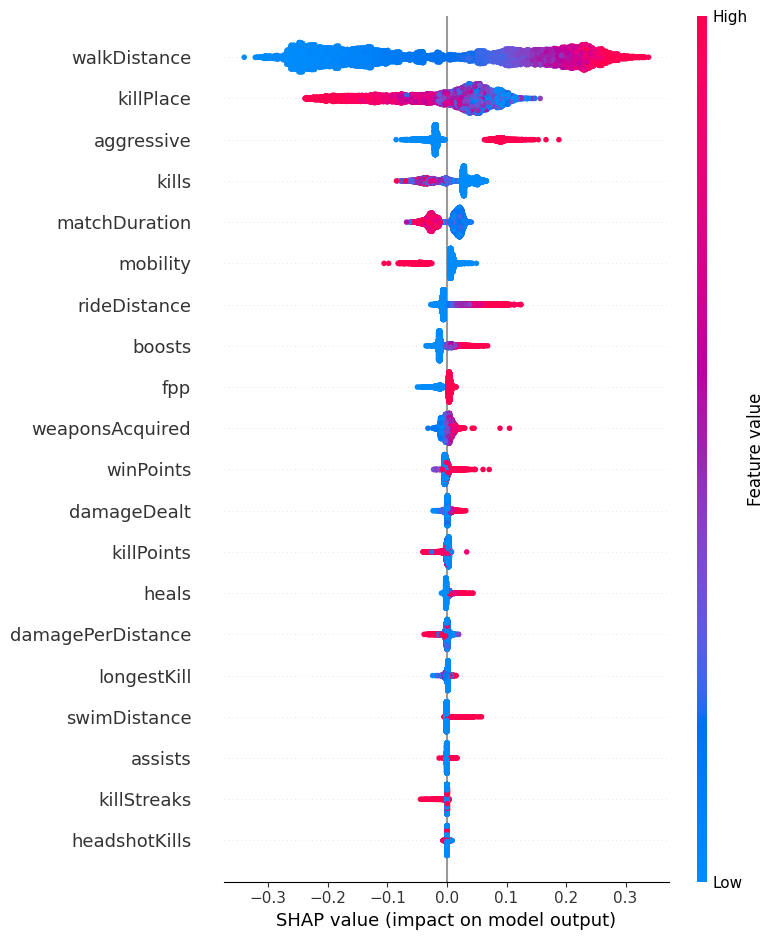

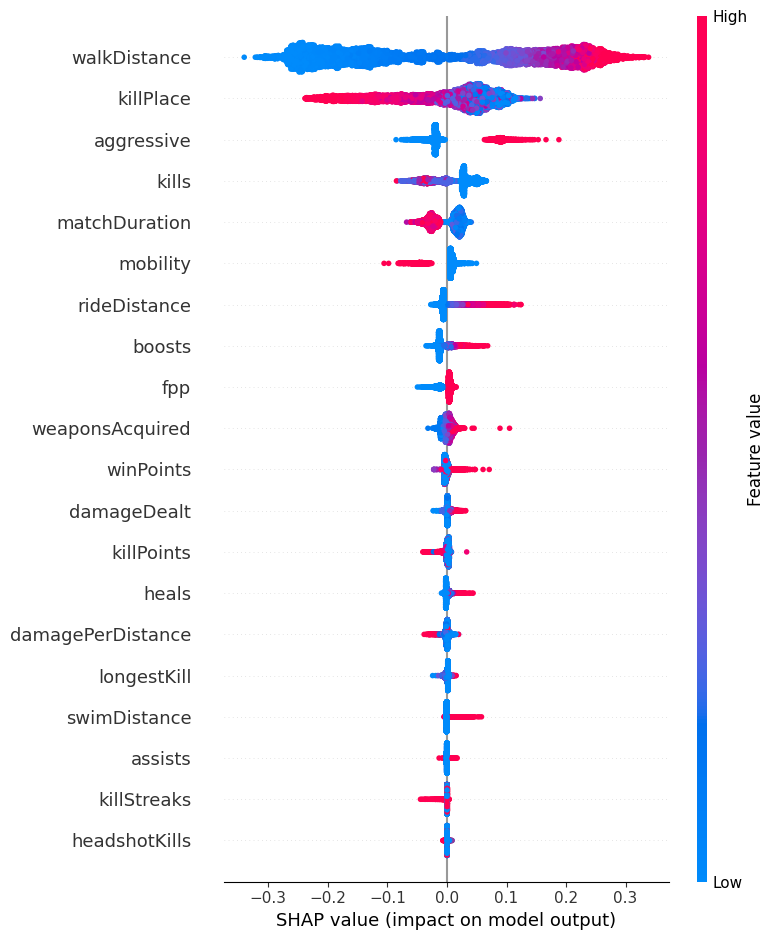

In [ ]:
import shap
# explainer 생성
explainer = shap.TreeExplainer(best_model_xgb_mm)
shap_values = explainer.shap_values(X_test_mm)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test_mm)


# explainer 생성
explainer = shap.TreeExplainer(best_model_xgb_sc)
shap_values = explainer.shap_values(X_test_sc)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test_sc)

In [30]:


print("XGBoost mm")
#mm
mse_xgb_mm = mean_squared_error(y_test_mm, y_pred_xgb_mm)
mse_rounded_xgb_mm = round(mse_xgb_mm, 4)
print("Mean Squared Error:", mse_rounded_xgb_mm)


r2_xgb_mm = r2_score(y_test_mm, y_pred_xgb_mm)
r2_rounded_xgb_mm = round(r2_xgb_mm, 4)
print("R-squared:", r2_rounded_xgb_mm)



mae_xgb_mm = mean_absolute_error(y_test_mm, y_pred_xgb_mm)
mae_rounded_xgb_mm = round(mae_xgb_mm, 4)
print("MAE:", mae_rounded_xgb_mm)

mse_xgb_mm = mean_squared_error(y_test_mm, y_pred_xgb_mm)
rmse_xgb_mm = np.sqrt(mse_xgb_mm)
rmse_rounded_xgb_mm = round(rmse_xgb_mm, 4)
print("RMSE:", rmse_rounded_xgb_mm)

print("\nXGBoost sc")
#sc
mse_xgb_mm = mean_squared_error(y_test_sc, y_pred_xgb_sc)
mse_rounded_xgb_mm = round(mse_xgb_mm, 4)
print("Mean Squared Error:", mse_rounded_xgb_mm)


r2_xgb_mm = r2_score(y_test_sc, y_pred_xgb_sc)
r2_rounded_xgb_mm = round(r2_xgb_mm, 4)
print("R-squared:", r2_rounded_xgb_mm)



mae_xgb_mm = mean_absolute_error(y_test_sc, y_pred_xgb_sc)
mae_rounded_xgb_mm = round(mae_xgb_mm, 4)
print("MAE:", mae_rounded_xgb_mm)

mse_xgb_mm = mean_squared_error(y_test_sc, y_pred_xgb_sc)
rmse_xgb_mm = np.sqrt(mse_xgb_mm)
rmse_rounded_xgb_mm = round(rmse_xgb_mm, 4)
print("RMSE:", rmse_rounded_xgb_mm)

XGBoost mm
Mean Squared Error: 0.0035
R-squared: 0.9599
MAE: 0.0435
RMSE: 0.059

XGBoost sc
Mean Squared Error: 0.0035
R-squared: 0.9599
MAE: 0.0434
RMSE: 0.0589


In [31]:

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

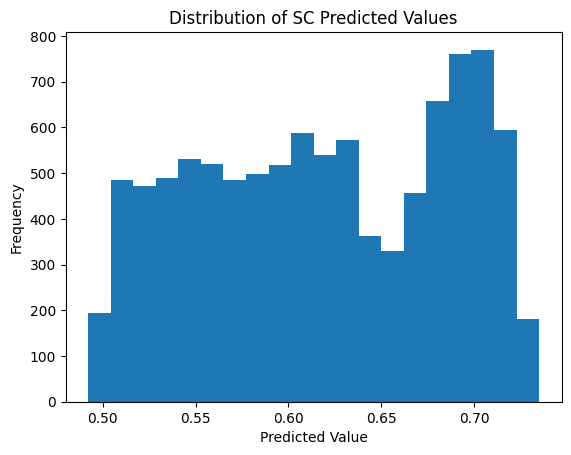

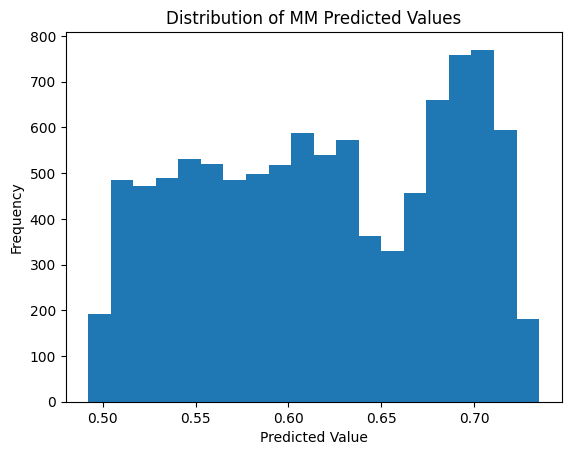

In [32]:
# 예측 값 분포 확인
y_pred_xgb_sc_limited = logistic_function(y_pred_xgb_sc)
plt.hist(y_pred_xgb_sc_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of SC Predicted Values')
plt.show()

# 예측 값 분포 확인
y_pred_xgb_mm_limited = logistic_function(y_pred_xgb_mm)
plt.hist(y_pred_xgb_mm_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of MM Predicted Values')
plt.show()

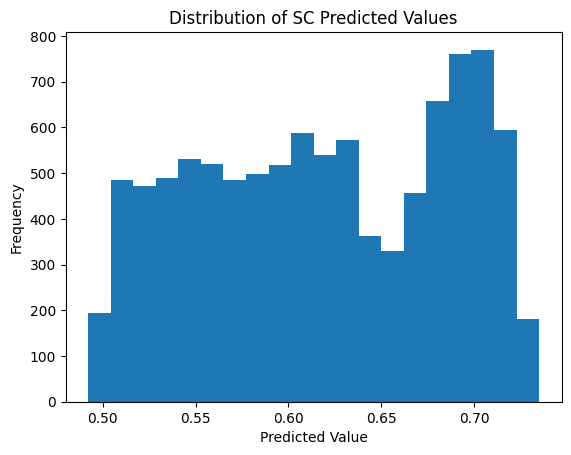

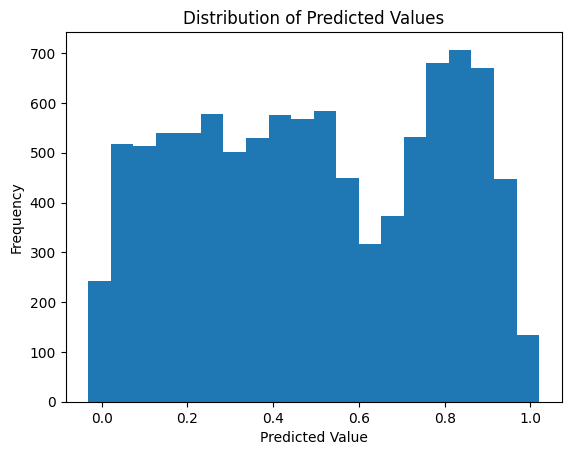

In [33]:
# 예측 값 분포 확인
y_pred_xgb_sc_limited = logistic_function(y_pred_xgb_sc)
plt.hist(y_pred_xgb_sc_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of SC Predicted Values')
plt.show()

# 예측 값 분포 확인
plt.hist(y_pred_xgb_sc, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

###LightGBM

In [ ]:
import lightgbm as lgb

# StandardScaler version
model_lgb_sc = lgb.LGBMRegressor()
model_lgb_sc.fit(X_train_sc, y_train_sc)
y_pred_lgb_sc = model_lgb_sc.predict(X_test_sc)

# MinMaxScaler version
model_lgb_mm = lgb.LGBMRegressor()
model_lgb_mm.fit(X_train_mm, y_train_mm)
y_pred_lgb_mm = model_lgb_mm.predict(X_test_mm)


In [ ]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_samples': [1, 5, 10]
}

# GridSearchCV 객체 생성 - StandardScaler version
gsearch_sc = GridSearchCV(estimator=model_lgb_sc,
                       param_grid=param_grid,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1)

# GridSearchCV 수행 - StandardScaler version
gsearch_sc.fit(X_train_sc, y_train_sc)

# 결과 출력 - StandardScaler version
print("Best parameters found (StandardScaler): ", gsearch_sc.best_params_)
print("Lowest RMSE found (StandardScaler): ", np.sqrt(np.abs(gsearch_sc.best_score_)))

best_model_lgb_sc = gsearch_sc.best_estimator_
y_pred_lgb_sc = best_model_lgb_sc.predict(X_test_sc)

# GridSearchCV 객체 생성 - MinMaxScaler version
gsearch_mm = GridSearchCV(estimator=model_lgb_mm,
                       param_grid=param_grid,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1)

# GridSearchCV 수행 - MinMaxScaler version
gsearch_mm.fit(X_train_mm, y_train_mm)

# 결과 출력 - MinMaxScaler version
print("Best parameters found (MinMaxScaler): ", gsearch_mm.best_params_)
print("Lowest RMSE found (MinMaxScaler): ", np.sqrt(np.abs(gsearch_mm.best_score_)))

best_model_lgb_mm = gsearch_mm.best_estimator_
y_pred_lgb_mm = best_model_lgb_mm.predict(X_test_mm)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found (StandardScaler):  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 10, 'n_estimators': 150, 'subsample': 0.7}
Lowest RMSE found (StandardScaler):  0.05953499132458588
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found (MinMaxScaler):  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 5, 'n_estimators': 150, 'subsample': 0.7}
Lowest RMSE found (MinMaxScaler):  0.059444997533403605


In [ ]:
print("LightGBM mm")
mse_lgb_mm = mean_squared_error(y_test_mm, y_pred_lgb_mm)
mse_rounded_lgb_mm = round(mse_lgb_mm, 4)
print("Mean Squared Error:", mse_rounded_lgb_mm)


r2_lgb_mm = r2_score(y_test_mm, y_pred_lgb_mm)
r2_rounded_lgb_mm = round(r2_lgb_mm, 4)
print("R-squared:", r2_rounded_lgb_mm)



mae_lgb_mm = mean_absolute_error(y_test_mm, y_pred_lgb_mm)
mae_rounded_lgb_mm = round(mae_lgb_mm, 4)
print("MAE:", mae_rounded_lgb_mm)

mse_lgb_mm = mean_squared_error(y_test_mm, y_pred_lgb_mm)
rmse_lgb_mm = np.sqrt(mse_lgb_mm)
rmse_rounded_lgb_mm = round(rmse_lgb_mm, 4)
print("RMSE:", rmse_rounded_lgb_mm)


print("\nLightGBM sc")
#sc
mse_lgb_sc = mean_squared_error(y_test_sc, y_pred_lgb_sc)
mse_rounded_lgb_sc = round(mse_lgb_sc, 4)
print("Mean Squared Error:", mse_rounded_lgb_sc)

r2_lgb_sc = r2_score(y_test_sc, y_pred_lgb_sc)
r2_rounded_lgb_sc = round(r2_lgb_sc, 4)
print("R-squared:", r2_rounded_lgb_sc)

mae_lgb_sc = mean_absolute_error(y_test_sc, y_pred_lgb_sc)
mae_rounded_lgb_sc = round(mae_lgb_sc, 4)
print("MAE:", mae_rounded_lgb_sc)

rmse_lgb_sc = np.sqrt(mse_lgb_sc)
rmse_rounded_lgb_sc = round(rmse_lgb_sc, 4)
print("RMSE:", rmse_rounded_lgb_sc)

LightGBM mm
Mean Squared Error: 0.0035
R-squared: 0.9592
MAE: 0.0436
RMSE: 0.0594

LightGBM sc
Mean Squared Error: 0.0035
R-squared: 0.9595
MAE: 0.0437
RMSE: 0.0592


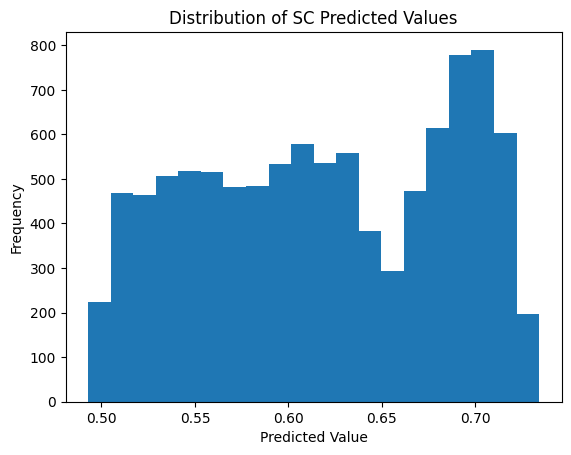

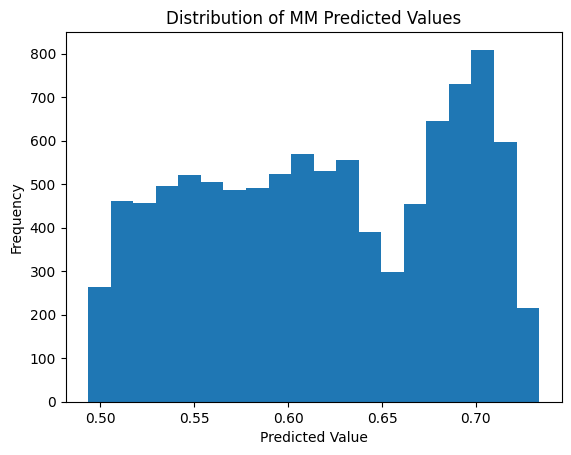

In [ ]:
# 예측 값 분포 확인
y_pred_lgb_sc_limited = logistic_function(y_pred_lgb_sc)
plt.hist(y_pred_lgb_sc_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of SC Predicted Values')
plt.show()

# 예측 값 분포 확인
y_pred_lgb_mm_limited = logistic_function(y_pred_lgb_mm)
plt.hist(y_pred_lgb_mm_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of MM Predicted Values')
plt.show()

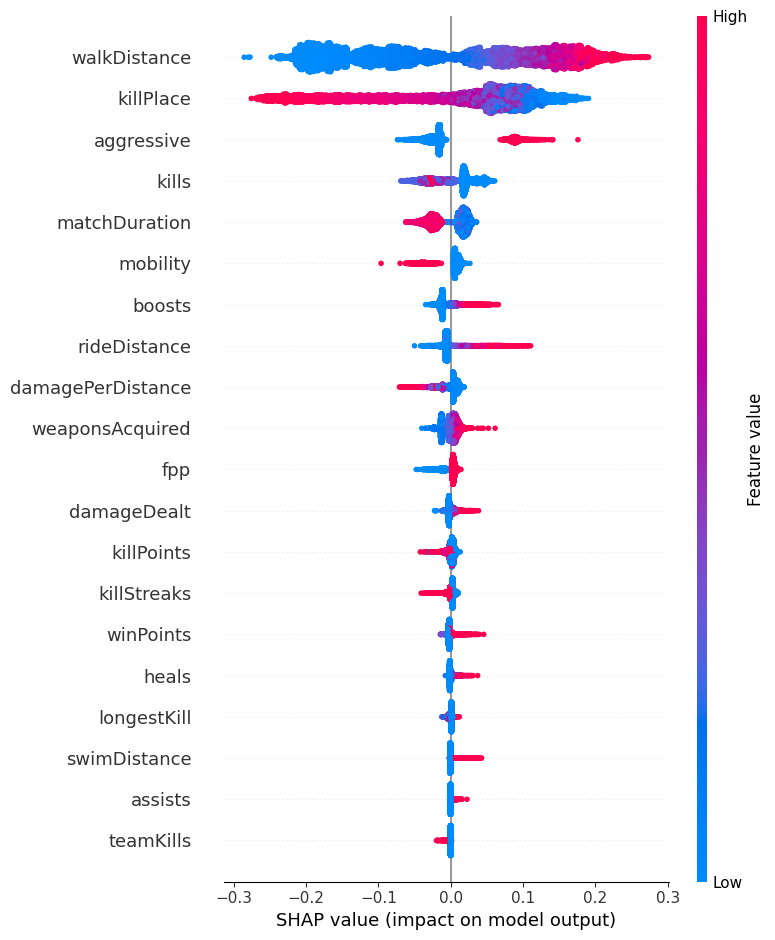

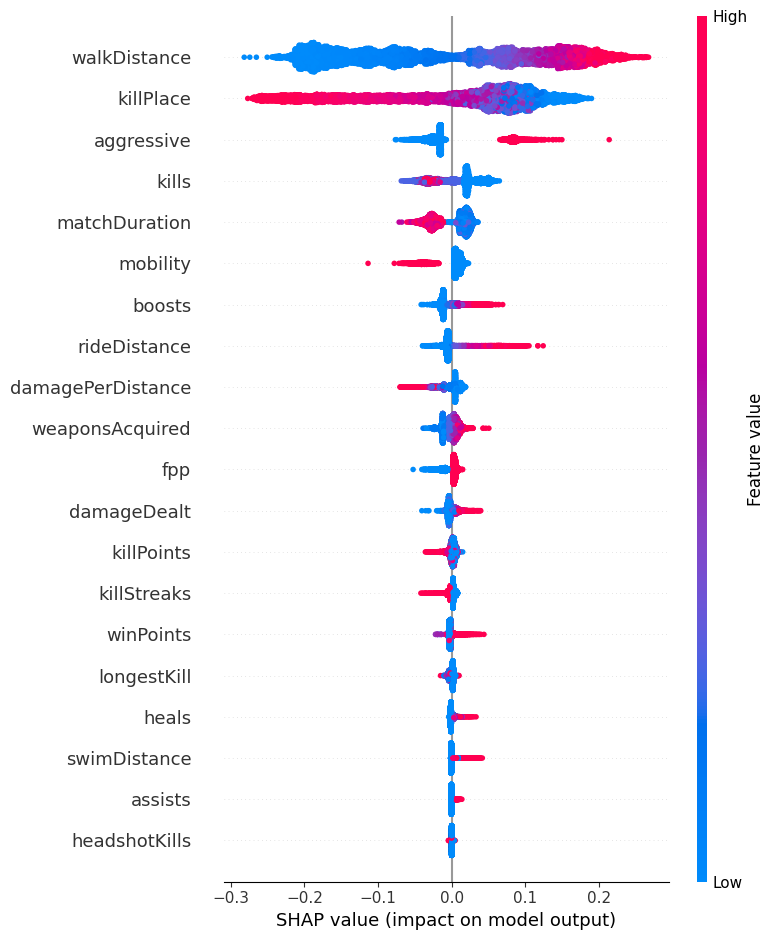

In [ ]:

# explainer 생성
explainer = shap.TreeExplainer(best_model_lgb_mm)
shap_values = explainer.shap_values(X_test_mm)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test_mm)

explainer = shap.TreeExplainer(best_model_lgb_sc)
shap_values = explainer.shap_values(X_test_sc)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test_sc)

###CatBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor

# CatBoost 모델 초기화
model_cb_sc = CatBoostRegressor()
model_cb_mm = CatBoostRegressor()

# 그리드를 정의합니다. 이는 검색할 하이퍼파라미터의 범위입니다.
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate' : [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

# 그리드서치 객체를 생성하고 데이터에 맞춥니다.
grid_search_cb_sc = GridSearchCV(model_cb_sc, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_cb_mm = GridSearchCV(model_cb_mm, param_grid, cv=3, n_jobs=-1, verbose=2)

# StandardScaler 데이터에 대해 그리드서치를 적용합니다.
grid_search_cb_sc.fit(X_train_sc, y_train_sc)

# MinMaxScaler 데이터에 대해 그리드서치를 적용합니다.
grid_search_cb_mm.fit(X_train_mm, y_train_mm)

# 그리드서치를 통해 얻은 최적의 하이퍼파라미터를 출력합니다.
print(grid_search_cb_sc.best_estimator_)
print(grid_search_cb_mm.best_estimator_)

best_model_cb_sc = grid_search_cb_sc.best_estimator_
y_pred_cb_sc = best_model_cb_sc.predict(X_test_sc)

best_model_cb_mm = grid_search_cb_mm.best_estimator_
y_pred_cb_mm = best_model_cb_mm.predict(X_test_mm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 0.2685253	total: 172ms	remaining: 17.1s
1:	learn: 0.2455370	total: 213ms	remaining: 10.4s
2:	learn: 0.2244952	total: 254ms	remaining: 8.21s
3:	learn: 0.2056170	total: 294ms	remaining: 7.04s
4:	learn: 0.1893846	total: 332ms	remaining: 6.31s
5:	learn: 0.1740141	total: 373ms	remaining: 5.84s
6:	learn: 0.1603691	total: 413ms	remaining: 5.49s
7:	learn: 0.1482753	total: 451ms	remaining: 5.19s
8:	learn: 0.1380556	total: 488ms	remaining: 4.94s
9:	learn: 0.1290927	total: 529ms	remaining: 4.76s
10:	learn: 0.1205480	total: 569ms	remaining: 4.6s
11:	learn: 0.1132907	total: 609ms	remaining: 4.47s
12:	learn: 0.1070050	total: 652ms	remaining: 4.36s
13:	learn: 0.1012657	total: 689ms	remaining: 4.23s
14:	learn: 0.0964701	total: 729ms	remaining: 4.13s
15:	learn: 0.0922102	total: 771ms	remaining: 4.04s
16:	learn: 0.0884478	total: 809ms	remaining: 3.95s
17:	learn: 0.0852489	total: 847ms	remaining: 3.86s
18:	learn: 0.0823949	total: 887m

In [ ]:
print("CatBoots mm")
mse_cb_mm = mean_squared_error(y_test_mm, y_pred_cb_mm)
mse_rounded_cb_mm = round(mse_cb_mm, 4)
print("Mean Squared Error:", mse_rounded_cb_mm)


r2_cb_mm = r2_score(y_test_mm, y_pred_cb_mm)
r2_rounded_cb_mm = round(r2_cb_mm, 4)
print("R-squared:", r2_rounded_cb_mm)



mae_cb_mm = mean_absolute_error(y_test_mm, y_pred_cb_mm)
mae_rounded_cb_mm = round(mae_cb_mm, 4)
print("MAE:", mae_rounded_cb_mm)

mse_cb_mm = mean_squared_error(y_test_mm, y_pred_cb_mm)
rmse_cb_mm = np.sqrt(mse_cb_mm)
rmse_rounded_cb_mm = round(rmse_cb_mm, 4)
print("RMSE:", rmse_rounded_cb_mm)


print("\nCatBoost sc")
#sc
mse_cb_sc = mean_squared_error(y_test_sc, y_pred_cb_sc)
mse_rounded_cb_sc = round(mse_cb_sc, 4)
print("Mean Squared Error:", mse_rounded_cb_sc)

r2_cb_sc = r2_score(y_test_sc, y_pred_cb_sc)
r2_rounded_cb_sc = round(r2_cb_sc, 4)
print("R-squared:", r2_rounded_cb_sc)

mae_cb_sc = mean_absolute_error(y_test_sc, y_pred_cb_sc)
mae_rounded_cb_sc = round(mae_cb_sc, 4)
print("MAE:", mae_rounded_cb_sc)

rmse_cb_sc = np.sqrt(mse_cb_sc)
rmse_rounded_cb_sc = round(rmse_cb_sc, 4)
print("RMSE:", rmse_rounded_cb_sc)

CatBoots mm
Mean Squared Error: 0.0037
R-squared: 0.9576
MAE: 0.0448
RMSE: 0.0606

CatBoost sc
Mean Squared Error: 0.0037
R-squared: 0.9576
MAE: 0.0448
RMSE: 0.0606


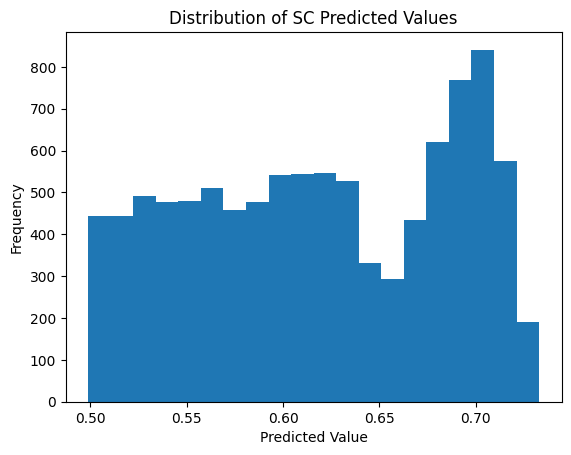

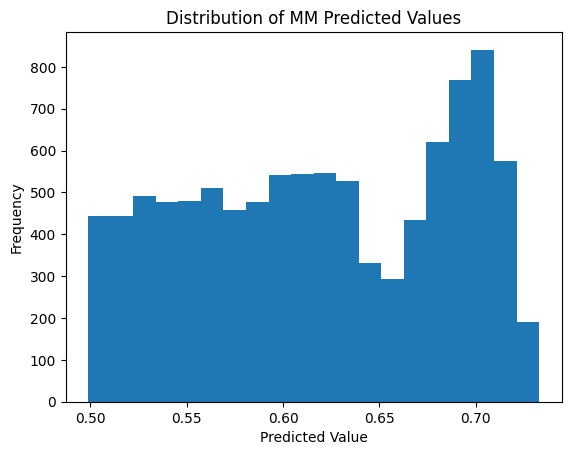

In [ ]:
# 예측 값 분포 확인
y_pred_cb_sc_limited = logistic_function(y_pred_cb_sc)
plt.hist(y_pred_cb_sc_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of SC Predicted Values')
plt.show()

# 예측 값 분포 확인
y_pred_cb_mm_limited = logistic_function(y_pred_cb_mm)
plt.hist(y_pred_cb_mm_limited, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of MM Predicted Values')
plt.show()

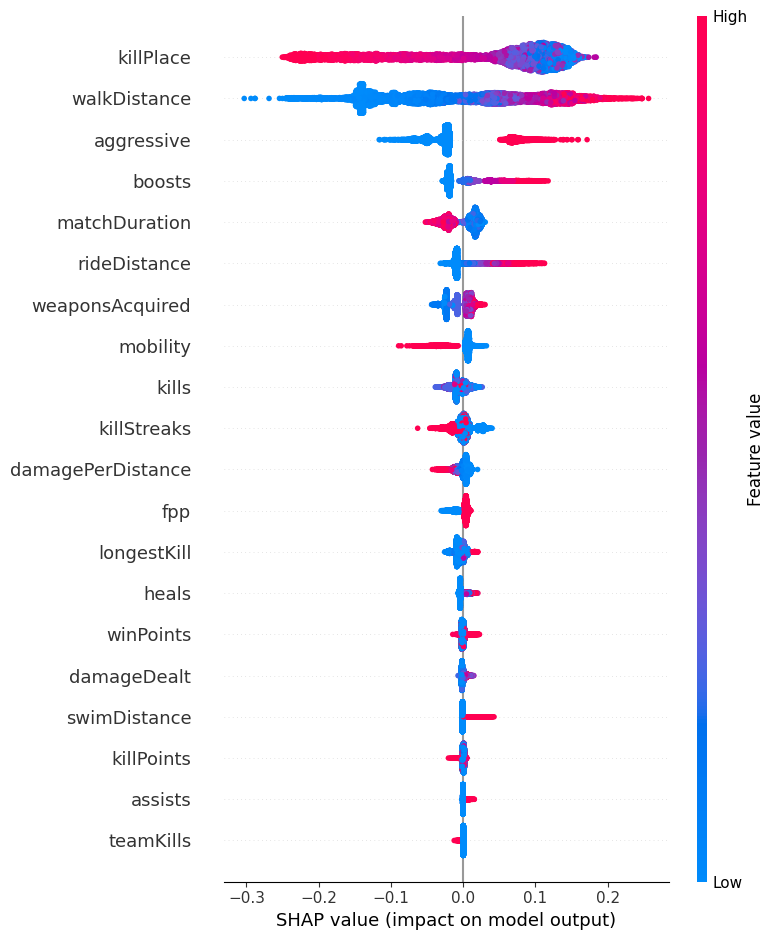

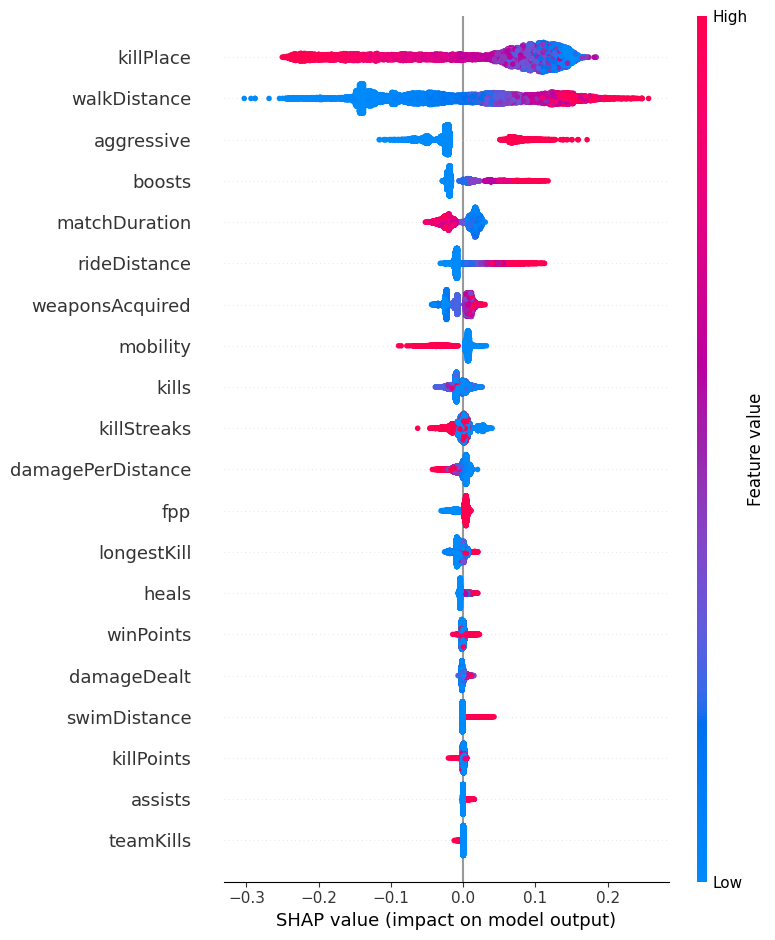

In [ ]:

# explainer 생성
explainer = shap.TreeExplainer(best_model_cb_mm)
shap_values = explainer.shap_values(X_test_mm)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test_mm)

explainer = shap.TreeExplainer(best_model_cb_sc)
shap_values = explainer.shap_values(X_test_sc)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test_sc)

###SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# 定义超参数范围
parameters = {'C': [1, 25, 100],
              'gamma': [0.01, 25]}

# 创建SVR模型
svr_sc = SVR(kernel='rbf', epsilon=0.2)

# 创建随机搜索对象
random_search_sc = RandomizedSearchCV(estimator=svr_sc, param_distributions=parameters, cv=5, refit=True)

# 在标准化后的训练数据上进行随机搜索
random_search_sc.fit(X_train_sc, y_train_sc)

# 创建MinMaxScaler SVR模型
svr_mm = SVR(kernel='rbf', epsilon=0.2)




In [ ]:
# 创建随机搜索对象
random_search_mm = RandomizedSearchCV(estimator=svr_mm, param_distributions=parameters, cv=5, refit=True)

# 在MinMaxScaler后的训练数据上进行随机搜索
random_search_mm.fit(X_train_mm, y_train_mm)

# 输出最佳参数和得分
print('Best Hyperparameters for Standardized Data:', random_search_sc.best_params_)
print('Best Score for Standardized Data:', random_search_sc.best_score_)

print('Best Hyperparameters for MinMax Scaled Data:', random_search_mm.best_params_)
print('Best Score for MinMax Scaled Data:', random_search_mm.best_score_)

Best Hyperparameters for Standardized Data: {'gamma': 0.01, 'C': 100}
Best Score for Standardized Data: 0.9221710799479362
Best Hyperparameters for MinMax Scaled Data: {'gamma': 0.01, 'C': 100}
Best Score for MinMax Scaled Data: 0.8969707650148596


In [ ]:

# 使用最佳参数重新训练模型
best_model_sc = random_search_sc.best_estimator_
best_model_mm = random_search_mm.best_estimator_

# 在测试集上进行预测
y_pred_svr_sc = best_model_sc.predict(X_test_sc)
y_pred_svr_mm = best_model_mm.predict(X_test_mm)

# 计算评估指标
mae_sc = mean_absolute_error(y_test_sc, y_pred_svr_sc)
mse_sc = mean_squared_error(y_test_sc, y_pred_svr_sc)
r2_sc = r2_score(y_test_sc, y_pred_svr_sc)

mae_mm = mean_absolute_error(y_test_mm, y_pred_svr_mm)
mse_mm = mean_squared_error(y_test_mm, y_pred_svr_mm)
r2_mm = r2_score(y_test_mm, y_pred_svr_mm)

print('Mean Absolute Error (MAE) for Standardized Data:', mae_sc,4)
print('Mean Squared Error (MSE) for Standardized Data:', mse_sc4)
print('R^2 Score for Standardized Data:', r2_sc,4)

print('Mean Absolute Error (MAE) for MinMax Scaled Data:', mae_mm,4)
print('Mean Squared Error (MSE) for MinMax Scaled Data:', mse_mm,4)
print('R^2 Score for MinMax Scaled Data:', r2_mm,4)


Mean Absolute Error (MAE) for Standardized Data: 0.06416883189456485
Mean Squared Error (MSE) for Standardized Data: 0.006566877990998387
R^2 Score for Standardized Data: 0.9241781988128317
Mean Absolute Error (MAE) for MinMax Scaled Data: 0.07553336541608281
Mean Squared Error (MSE) for MinMax Scaled Data: 0.008812195131196167
R^2 Score for MinMax Scaled Data: 0.8982535524223275


Text(0.5, 1.0, 'SVR Predictions(Standard Scaler)')

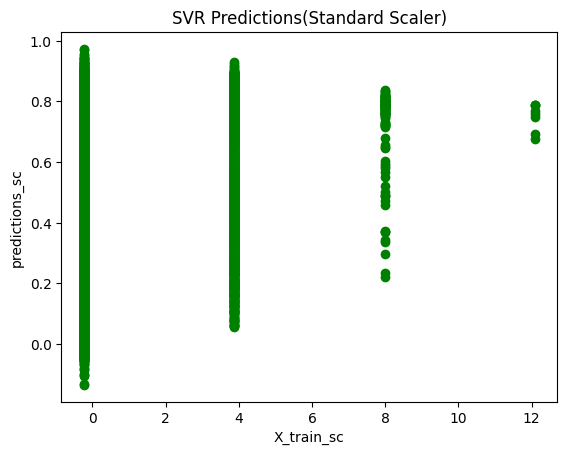

In [ ]:
# 예측값 분포 - Standard Scaler SVR 모델
y_pred_svr_sc = model_sc_svr.predict(X_train_sc)
plt.scatter(X_train_sc.iloc[:,0], y_pred_svr_sc, color='green', label='Predicted')
plt.xlabel('X_train_sc')
plt.ylabel('predictions_sc')
plt.title('SVR Predictions(Standard Scaler)')

Text(0.5, 1.0, 'SVR Predictions(MinMaxScaler)')

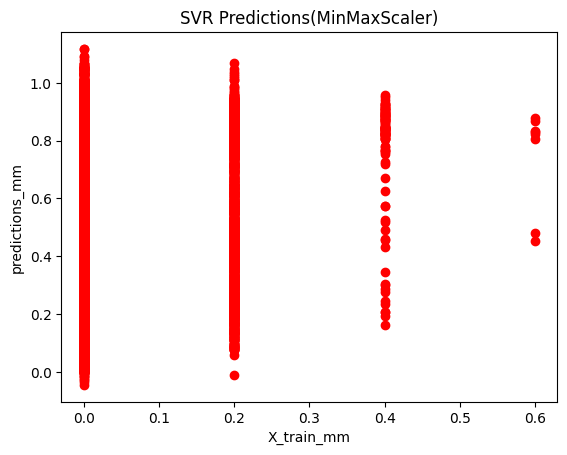

In [ ]:
y_pred_svr_mm = model_mm_svr.predict(X_train_mm)
plt.scatter(X_train_mm.iloc[:,0], y_pred_svr_mm, color='red', label='Predicted')
plt.xlabel('X_train_mm')
plt.ylabel('predictions_mm')
plt.title('SVR Predictions(MinMaxScaler)')

In [ ]:
import shap

# 创建KernelExplainer对象
explainer_mm = shap.KernelExplainer(best_model_mm.predict, X_train_mm)
explainer_sc = shap.KernelExplainer(best_model_sc.predict, X_train_sc)

# 计算SHAP值
shap_values_mm = explainer_mm.shap_values(X_test_mm)
shap_values_sc = explainer_sc.shap_values(X_test_sc)

# SHAP值可视化
shap.summary_plot(shap_values_mm, X_test_mm)
shap.summary_plot(shap_values_sc, X_test_sc)


  0%|          | 0/10000 [00:00<?, ?it/s]